You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)



# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
df.shape

(768, 9)

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
plot = sns.pairplot(df)
plot.fig.set_size_inches(15,15)

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

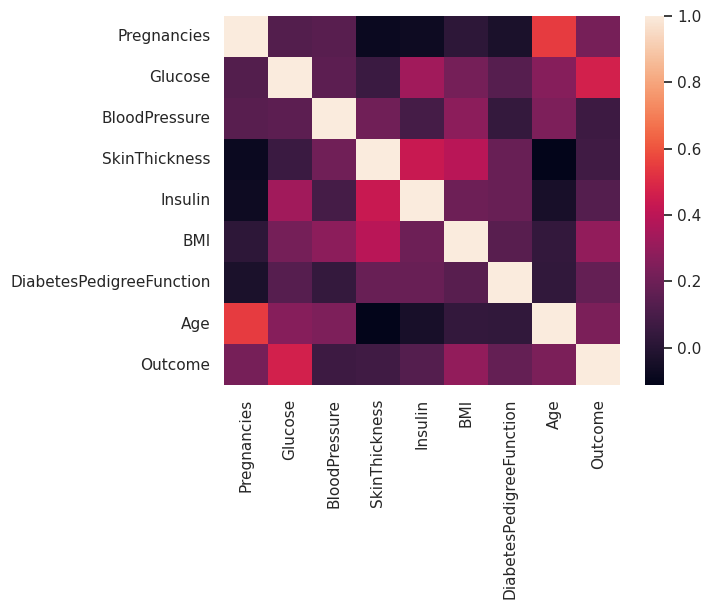

In [35]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='Age', ylabel='BMI'>

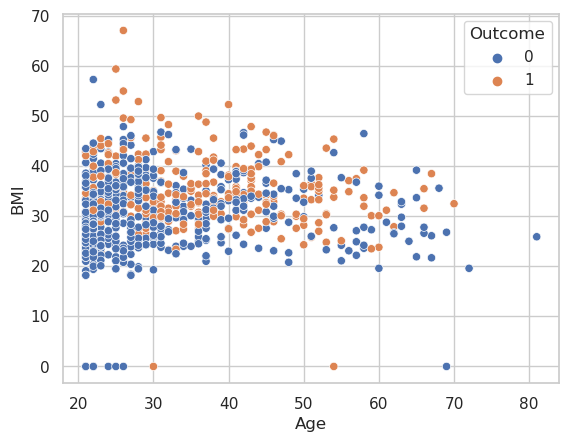

In [34]:
sns.scatterplot(x=df.Age,y=df.BMI,hue=df.Outcome)

<AxesSubplot: xlabel='Age', ylabel='Glucose'>

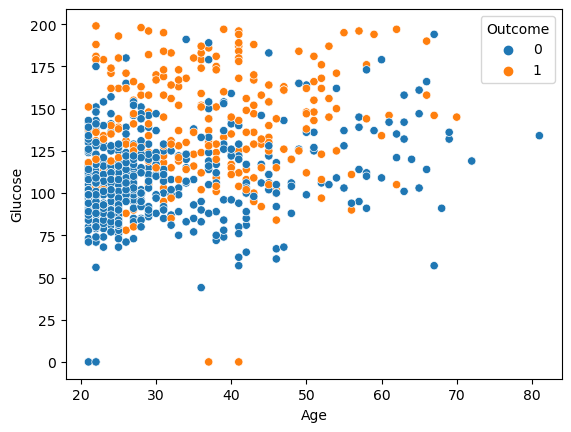

In [71]:
sns.scatterplot(x=df.Age,y=df.Glucose,hue=df.Outcome)

<AxesSubplot: >

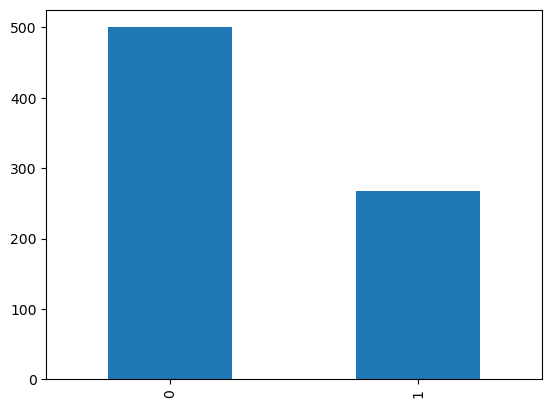

In [20]:
df.Outcome.value_counts().plot(kind='bar')

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [21]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

No missing values to be cleaned and no categorical variables

<AxesSubplot: >

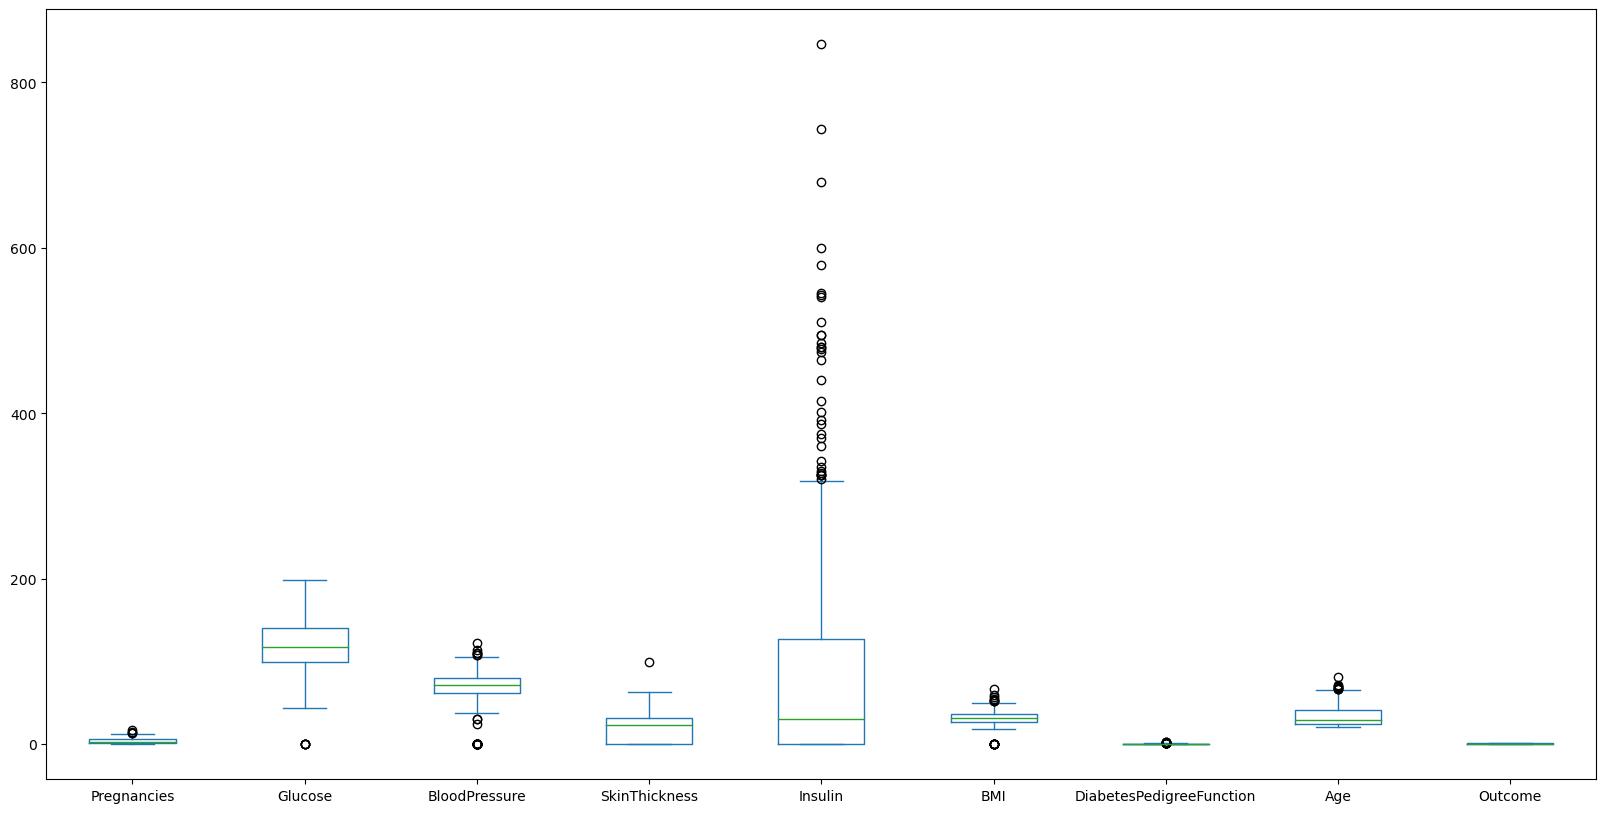

In [30]:
df.plot(kind='box',figsize=(20,10))

In [22]:
from scipy import stats

In [23]:
q1 = np.percentile(df.Insulin, 25, method='midpoint')
q3 = np.percentile(df.Insulin, 75, method='midpoint')
iqr = stats.iqr(df.Insulin)
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr



In [24]:
outliers = np.where(df.Insulin >= ub)[0]

In [25]:
df.drop(index=outliers,inplace=True)

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(587, 8) (587,) (147, 8) (147,)


# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

In [27]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(dt,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [28]:
best_params = grid_search.best_params_

In [29]:
dt = DecisionTreeClassifier(**best_params,random_state = 42)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [42]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,auc,roc_curve

y_pred = dt.predict(X_test)

In [33]:
print('Accuracy = %.2f'%accuracy_score(y_test,y_pred))
print('Precision = %.2f'%precision_score(y_test,y_pred))
print('Recall = %.2f'%recall_score(y_test,y_pred))
print('F-1 score = %.2f'%f1_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))

Accuracy = 0.72
Precision = 0.55
Recall = 0.75
F-1 score = 0.64
Confusion Matrix
 [[70 29]
 [12 36]]


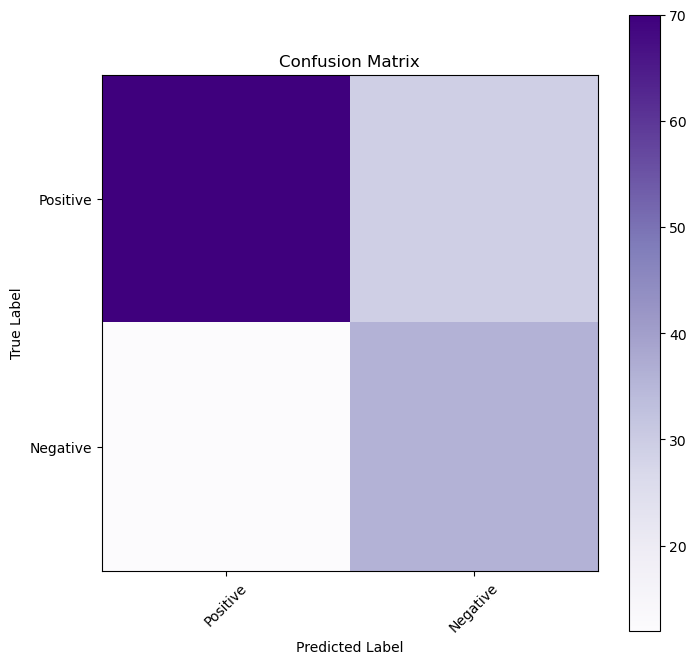

In [40]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
plt.imshow(cm,interpolation = 'nearest' , cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(2),['Positive','Negative'],rotation=45)
plt.yticks(range(2),['Positive','Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
fpr,tpr, thresholds = roc_curve(y_test,dt.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)

print('AUC = %.2f'%roc_auc)



AUC = 0.76


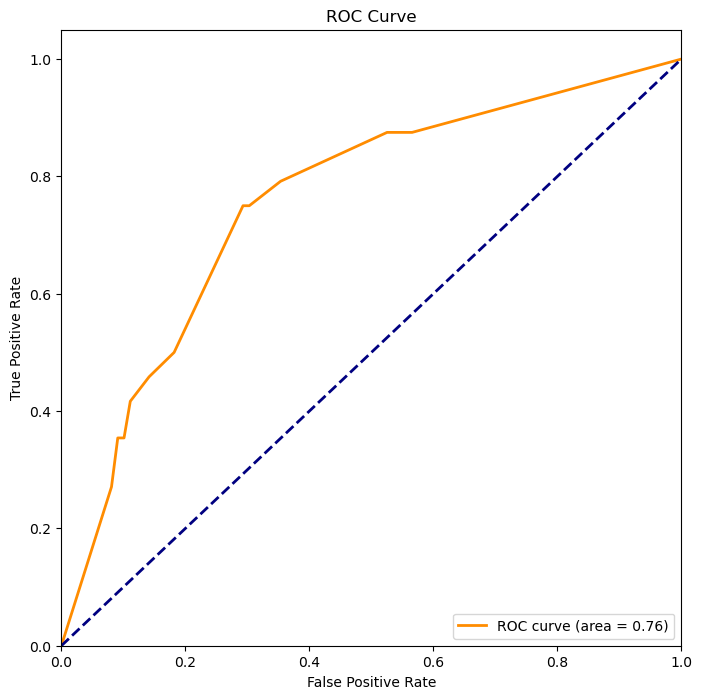

In [57]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

[Text(0.5073529411764706, 0.9166666666666666, 'x[1] <= 127.5\ngini = 0.45\nsamples = 587\nvalue = [386, 201]'),
 Text(0.24019607843137256, 0.75, 'x[7] <= 28.5\ngini = 0.305\nsamples = 384\nvalue = [312, 72]'),
 Text(0.12745098039215685, 0.5833333333333334, 'x[5] <= 45.4\ngini = 0.153\nsamples = 216\nvalue = [198, 18]'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[5] <= 30.95\ngini = 0.131\nsamples = 212\nvalue = [197, 15]'),
 Text(0.0392156862745098, 0.25, 'x[6] <= 0.672\ngini = 0.017\nsamples = 120\nvalue = [119, 1]'),
 Text(0.0196078431372549, 0.08333333333333333, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.11764705882352941, 0.25, 'x[2] <= 53.0\ngini = 0.258\nsamples = 92\nvalue = [78, 14]'),
 Text(0.09803921568627451, 0.08333333333333333, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.13725490196078433, 0.08333333333333333, 'gini = 0.21\nsamples = 84\nvalue = [74, 

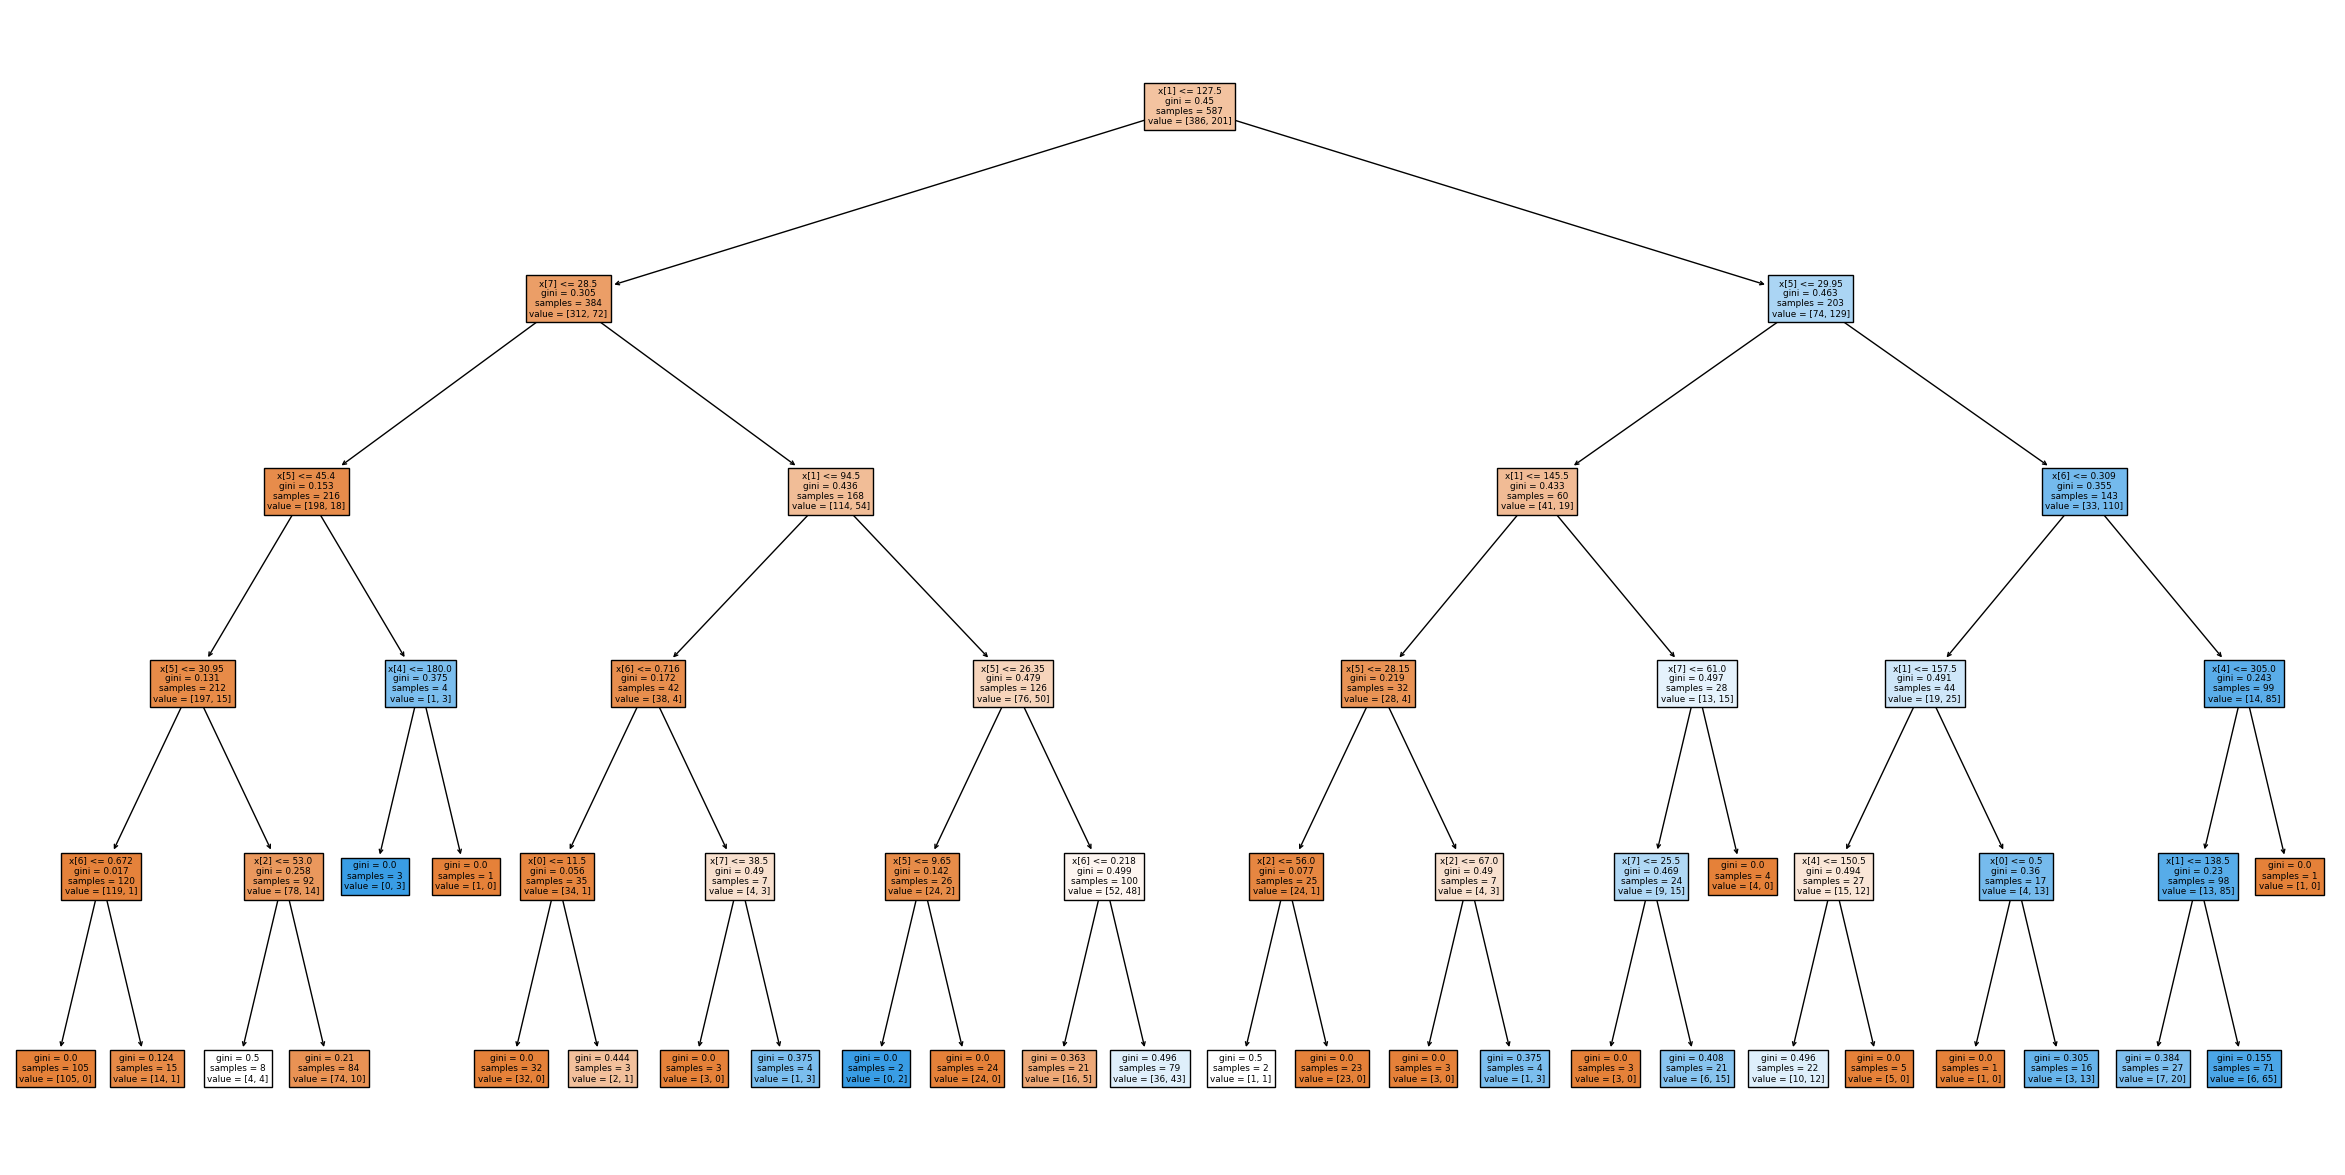

In [61]:
from sklearn import tree

plt.figure(figsize=(30,15))

tree.plot_tree(dt,filled=True)

In [65]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
importance.sort_values('Importance',ascending=False)

,Feature,Importance
1,Glucose,0.471311
5,BMI,0.245719
7,Age,0.125867
6,DiabetesPedigreeFunction,0.071551
4,Insulin,0.037855
2,BloodPressure,0.034744
0,Pregnancies,0.012952
3,SkinThickness,0.000000


In [70]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

- The most important features seem to be Glucose and BMI
- The main decision split is at a Glucose level of 127.5
- The next main decision split is at a BMI of 29.95

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')


print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.71428571 0.66666667 0.70748299 0.78231293 0.71232877]
Mean CV Accuracy: 0.7166154132886031
